## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [27]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [53]:
df[['TV','Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

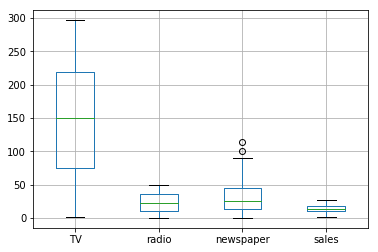

In [7]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

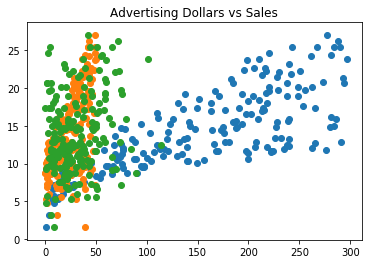

In [15]:
plt.scatter(df["TV"],df["sales"],label="TV")
plt.scatter(df["radio"],df["sales"],label="TV")
plt.scatter(df["newspaper"],df["sales"],label="TV")
plt.title("Advertising Dollars vs Sales")
plt.show()

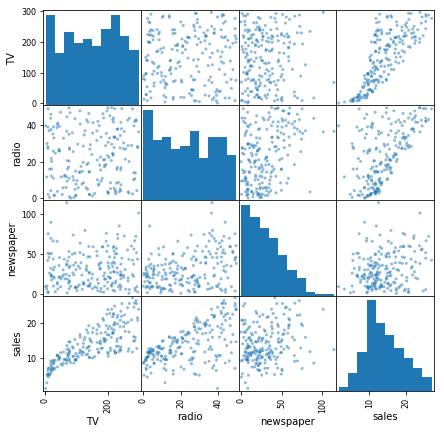

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(7,7))
plt.show()
df.corr()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Sales has the highest highest correlation with the advertising cost spent on TV(0.782224). Costs spent on radio and newspaper have correlation of 0.576223 and 0.228299, respectively.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [24]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [19]:
y = df['sales']

b) Set X to be just the features described above in df

In [21]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


d) Train model on training data, and make predictions on testing data

In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Coefficients: ", regr.coef_)

y_pred = regr.predict(X_test)
print("Prediction: ", y_pred)

Coefficients:  [0.04472952 0.18919505 0.00276111]
Prediction:  [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [37]:
R2 = regr.score(X_test,y_test)
print("R^2 =", R2)

R^2 = 0.899438024100912


The R^2 score of 0.9 is relatively good.
f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Text(0,0.5,'Predicted Data')

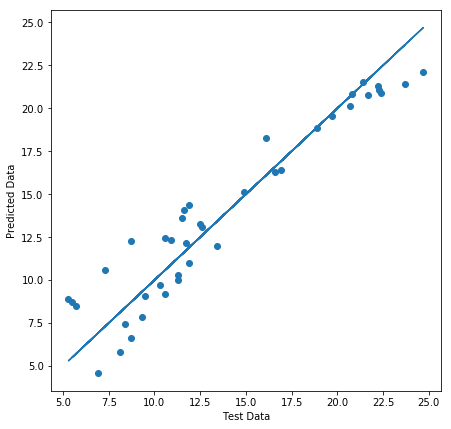

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test) #slope of 1
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')


g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

The coefficients here show different results from the correlation we observed before. Radio is more likely to increase the sale with the coefficient of 0.18919505. Before drawing conclusions, we need to remove the collinear factors and standardize the coefficient and then see which coefficient is the most significant.

In [41]:
print('Coefficients: ', regr.coef_)
print("Residual sum of squares error: %.2f")


Coefficients:  [0.04472952 0.18919505 0.00276111]
Residual sum of squares error: %.2f


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

TV and radio affect sales, but newspaper is almost negligible. As mentioned in g, we need to standardize the coefficients.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

There is some nonlinear interaction

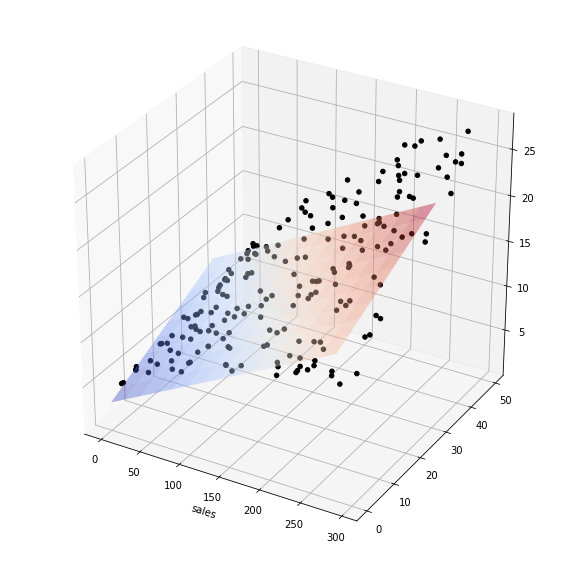

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = df)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 20)
y_surf = np.arange(0, 40, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.scatter(df['TV'],df['radio'],df['sales'],c='black',marker='o',alpha=1)
ax.set_xlabel('TV')
ax.set_xlabel('radio')
ax.set_xlabel('sales')
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [94]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learningRate)
    return [b, m]

def run(num_iterations, eta):
    points = genfromtxt("/Users/jaewonlee/Documents/python-introduction-lee-jw/APMAE4990--master/data/data.csv", delimiter=",")
    learningRate = eta
    initial_b = 0
    initial_m = 0
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learningRate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


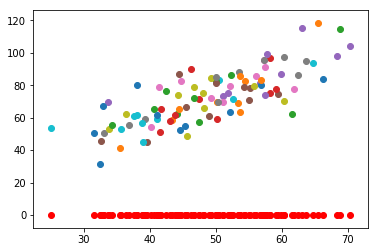

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


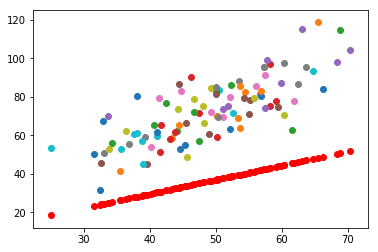

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


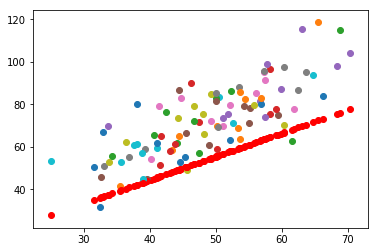

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


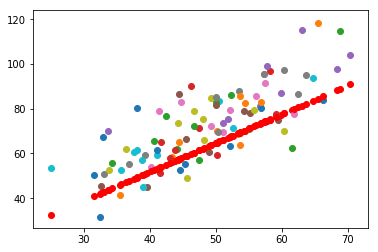

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


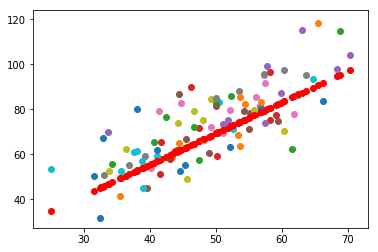

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


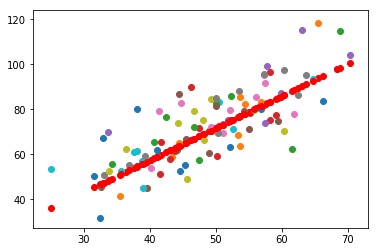

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


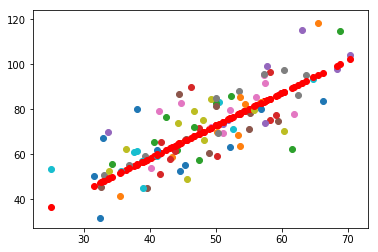

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


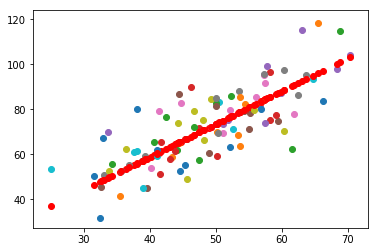

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


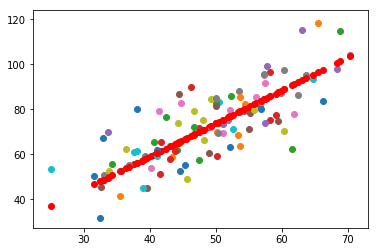

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


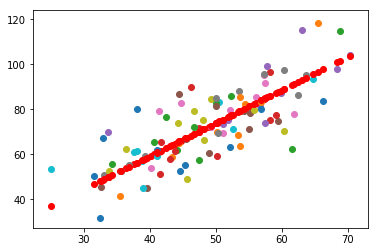

In [102]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num,0.0001)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.


Learning Rate:  5e-05
5
20


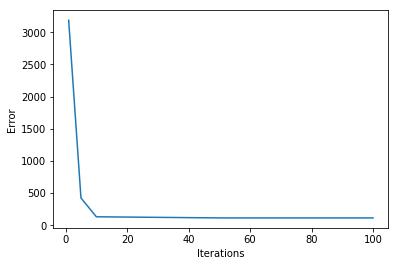

Learning Rate:  7.368421052631579e-05
5
20


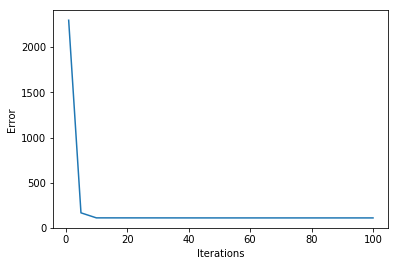

Learning Rate:  9.736842105263158e-05
5
20


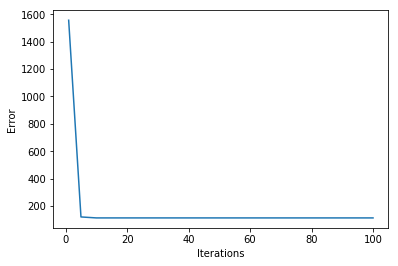

Learning Rate:  0.00012105263157894736
5
20


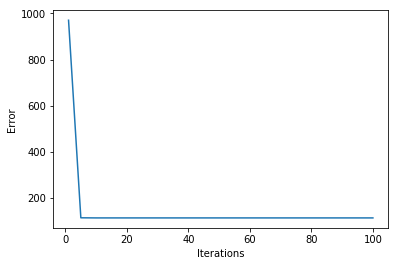

Learning Rate:  0.00014473684210526317
5
20


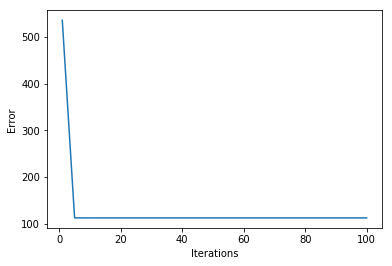

Learning Rate:  0.00016842105263157895
5
20


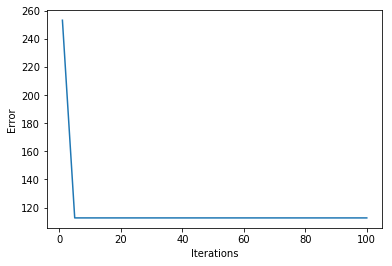

Learning Rate:  0.00019210526315789473
5
20


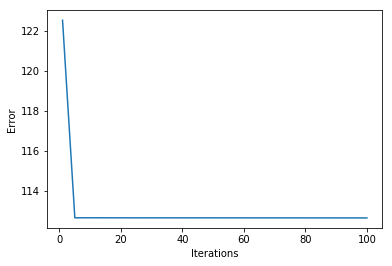

Learning Rate:  0.00021578947368421054
5
20


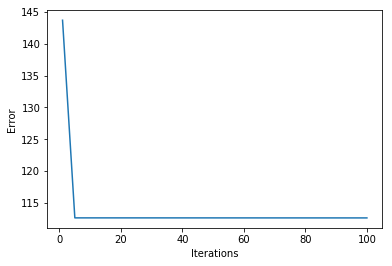

Learning Rate:  0.00023947368421052632
5
20


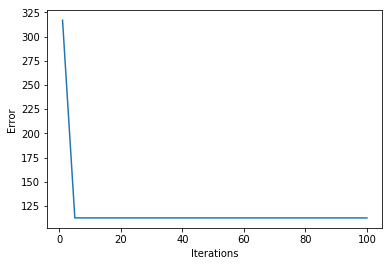

Learning Rate:  0.0002631578947368421
5
20


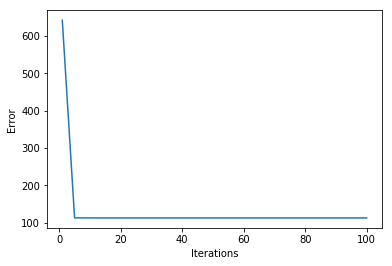

Learning Rate:  0.00028684210526315793
5
20


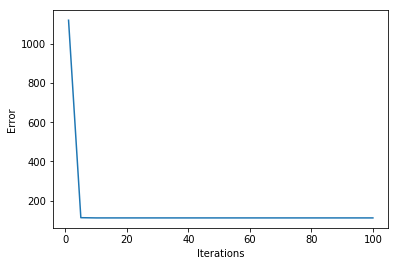

Learning Rate:  0.0003105263157894737
5
20


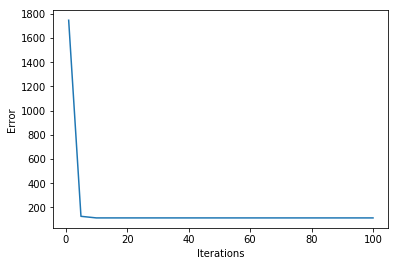

Learning Rate:  0.0003342105263157895
5
20


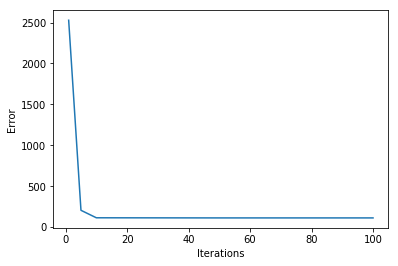

Learning Rate:  0.0003578947368421053
5
20


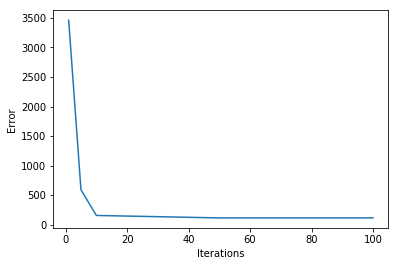

Learning Rate:  0.0003815789473684211
5
20


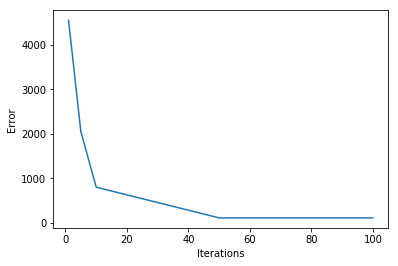

Learning Rate:  0.0004052631578947369
5
20


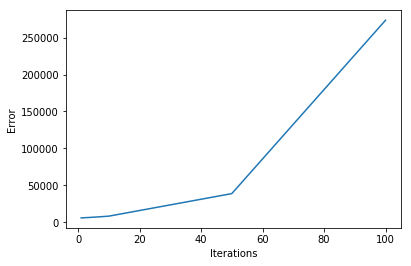

Learning Rate:  0.00042894736842105267
5
20


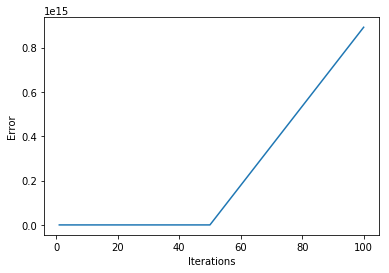

Learning Rate:  0.00045263157894736845
5
20


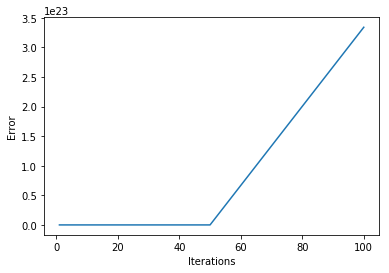

Learning Rate:  0.00047631578947368423
5
20


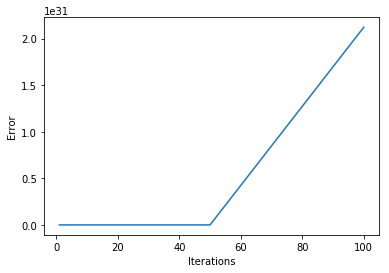

Learning Rate:  0.0005
5
20


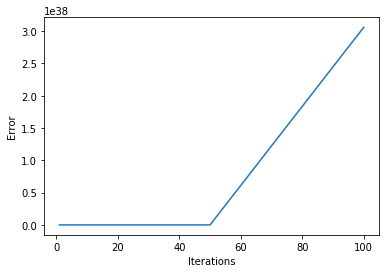

In [130]:
points = genfromtxt("/Users/jaewonlee/Documents/python-introduction-lee-jw/APMAE4990--master/data/data.csv", delimiter=",")
initial_b = 0
initial_m = 0

def run_iter(num_iter, learning_rate):
    [b,m] = gradient_descent_runner(points,initial_b,initial_m,learning_rate,num_iter)
    return compute_error_for_line_given_points(b,m,points)

iterations = [1, 5, 10, 50, 100]
learning_rate = np.linspace(0.00005,0.0005,20)
for l in learning_rate:
    errors = []
    print('Learning Rate: ', l)
    for i in iterations:
        errors.append(run_iter(i,l))
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    print(size(errors))
    print(size(learning_rate))
    
    plt.plot(iterations,errors,label='Learning Rate='+ str(learning_rate))
    plt.show()